In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## Path where all the crime report files are availab;e
folder_path = r'/content/drive/MyDrive/Boston_crime'

# Change the current working directory as the above folder path
os.chdir(folder_path)

files=os.listdir()

files

['crime_report_2015.csv',
 'crime_report_2016.csv',
 'crime_report_2017.csv',
 'crime_report_2018.csv',
 'crime_report_2019.csv',
 'crime_report_2020.csv',
 'crime_report_2021.csv',
 'crime_report_2022.csv',
 'crime-incident-reports-2015.csv',
 'crime-incident-reports-2016.csv',
 'crime-incident-reports-2017.csv',
 'crime-incident-reports-2018.csv',
 'crime-incident-reports-2019.csv',
 'crime-incident-reports-2020.csv',
 'crime-incident-reports-2022.csv',
 'rmsoffensecodes.xlsx',
 'crime_report_2023.csv',
 'crime_reports_cleaned.csv',
 'Count_Violent_vs_nonviolent.png',
 'crime_y2018.html',
 'crime_y2019.html',
 'crime_y2020.html',
 'crime_y2021.html',
 'crime_2020_clustermap.html',
 'violent_crime_2021_heatmap.html',
 'Crime_Categories.png',
 'crime_reports_cleaned_new.csv']

In [6]:
data = pd.read_csv("crime_reports_cleaned_new.csv")
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
0,192070453,100,0,2019-09-03 23:25:00,2019,9,Tuesday,23,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,MIGRATED REPORT - CRIMINAL HOMICIDE,HOMICIDE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
1,212002782,520,0,2021-01-13 10:10:00,2021,1,Wednesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,BURGLARY - RESIDENTIAL - FORCE,RESIDENTIAL BURGLARY,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
2,212025886,614,0,2021-04-22 09:48:00,2021,4,Thursday,9,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,LARCENY THEFT FROM MV - NON-ACCESSORY,LARCENY FROM MOTOR VEHICLE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
3,212002485,801,0,2021-01-12 10:00:00,2021,1,Tuesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
4,212016939,801,0,2021-03-17 02:41:00,2021,3,Wednesday,2,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County


In [7]:
data["Date"] = pd.to_datetime(pd.to_datetime(data["OCCURRED_ON_DATE"]).dt.date)

In [8]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY,Date
0,192070453,100,0,2019-09-03 23:25:00,2019,9,Tuesday,23,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,MIGRATED REPORT - CRIMINAL HOMICIDE,HOMICIDE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2019-09-03
1,212002782,520,0,2021-01-13 10:10:00,2021,1,Wednesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,BURGLARY - RESIDENTIAL - FORCE,RESIDENTIAL BURGLARY,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2021-01-13
2,212025886,614,0,2021-04-22 09:48:00,2021,4,Thursday,9,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,LARCENY THEFT FROM MV - NON-ACCESSORY,LARCENY FROM MOTOR VEHICLE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2021-04-22
3,212002485,801,0,2021-01-12 10:00:00,2021,1,Tuesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2021-01-12
4,212016939,801,0,2021-03-17 02:41:00,2021,3,Wednesday,2,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County,2021-03-17


<Axes: xlabel='Date'>

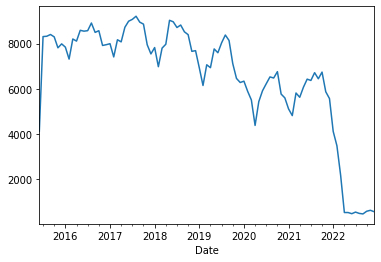

In [9]:
monthly_crime_df = data.groupby(pd.Grouper(key = "Date", freq = "M")).count()
monthly_crime_df.INCIDENT_NUMBER.plot()

In [10]:
monthly_crime_df = monthly_crime_df.loc[:"2022-02-28"]
monthly_crime_df

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2015-06-30,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4122,2637,3654,4131,4131
2015-07-31,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8296,5232,7399,8310,8312
2015-08-31,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8309,5203,7445,8323,8326
2015-09-30,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8394,5300,7553,8402,8404
2015-10-31,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8287,5247,7389,8298,8299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6741,6731,4245,6182,6739,6741
2021-11-30,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5871,5858,3718,5396,5869,5871
2021-12-31,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,5561,3550,5009,5567,5570


<Axes: xlabel='Date'>

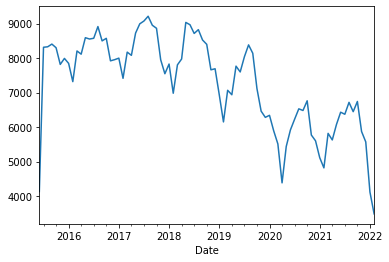

In [11]:
monthly_crime_df.INCIDENT_NUMBER.plot()

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [13]:
auto_arima(monthly_crime_df.INCIDENT_NUMBER, seasonal=True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   81
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -628.366
Date:                              Tue, 28 Mar 2023   AIC                           1264.732
Time:                                      23:19:26   BIC                           1274.260
Sample:                                  06-30-2015   HQIC                          1268.552
                                       - 02-28-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2385      0.091      2.623      0.009       0.060       0.417
ar.S.L12       0.8898      0.109      8.149      0.000       0.676       1.104
ma.S.L12      -0.6205      0.203     -3.057      0.002      -1.018      -0.223
sigma2      3.743e+05    5.1e+04      7.341      0.000    2.74e+05    4.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.92   Jarque-Bera (JB):               358.94
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             1.75
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
df_train = monthly_crime_df[:"2020-08-30"]
df_test = monthly_crime_df["2020-08-30":]

In [15]:
df_train

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2015-06-30,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4131,4122,2637,3654,4131,4131
2015-07-31,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8312,8296,5232,7399,8310,8312
2015-08-31,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8326,8309,5203,7445,8323,8326
2015-09-30,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404,8394,5300,7553,8402,8404
2015-10-31,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8299,8287,5247,7389,8298,8299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,5510,5510,5510,5510,5510,5510,5510,5510,5510,5510,5510,5510,5510,5510,5503,3414,4976,5509,5510
2020-04-30,4383,4383,4383,4383,4383,4383,4383,4383,4383,4383,4383,4383,4383,4383,4378,2664,3930,4383,4383
2020-05-31,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437,5428,3356,4882,5434,5437


In [16]:
df_test

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2020-08-31,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6528,6518,4020,5899,6527,6528
2020-09-30,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6471,4000,5873,6478,6480
2020-10-31,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6761,6756,4237,6127,6760,6761
2020-11-30,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5769,5760,3490,5240,5769,5769
2020-12-31,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5601,5590,3425,5050,5601,5601
2021-01-31,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5113,5105,3121,4607,5113,5113
2021-02-28,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4817,4810,2892,4405,4816,4817
2021-03-31,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5817,5810,3480,5261,5817,5817
2021-04-30,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,5614,3395,5129,5626,5627


In [17]:
model = SARIMAX(df_train.INCIDENT_NUMBER, order =(1, 1, 0), seasonal_order=(1, 0, [1], 12)).fit()

In [18]:
start = "2020-08-31"
end = "2022-02-28"

In [19]:
predictions = model.predict(start, end, typ = "levels").rename("Predictions")
predictions

2020-08-31    6274.124890
2020-09-30    6089.965914
2020-10-31    5904.425348
2020-11-30    5416.686271
2020-12-31    5367.260229
2021-01-31    5294.554271
2021-02-28    4844.889773
2021-03-31    5273.622045
2021-04-30    5110.946833
2021-05-31    5749.186730
2021-06-30    6054.037057
2021-07-31    6645.288970
2021-08-31    6768.074961
2021-09-30    6604.300866
2021-10-31    6424.266161
2021-11-30    5938.080396
2021-12-31    5889.058689
2022-01-31    5816.471300
2022-02-28    5366.909690
Freq: M, Name: Predictions, dtype: float64

In [20]:
df_test.INCIDENT_NUMBER

Date
2020-08-31    6528
2020-09-30    6480
2020-10-31    6761
2020-11-30    5769
2020-12-31    5601
2021-01-31    5113
2021-02-28    4817
2021-03-31    5817
2021-04-30    5627
2021-05-31    6074
2021-06-30    6430
2021-07-31    6371
2021-08-31    6716
2021-09-30    6446
2021-10-31    6741
2021-11-30    5871
2021-12-31    5570
2022-01-31    4117
2022-02-28    3483
Freq: M, Name: INCIDENT_NUMBER, dtype: int64

<Axes: xlabel='Date'>

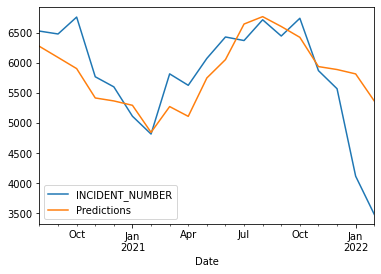

In [21]:
df_test.INCIDENT_NUMBER.plot(legend = True)
predictions.plot(legend = True)

In [22]:
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [23]:
mape(df_test.INCIDENT_NUMBER, predictions)

9.53516571120841

In [24]:
monthly_crime_df.INCIDENT_NUMBER.mean()

7266.16049382716

In [25]:
rmse(predictions, df_test.INCIDENT_NUMBER)

677.3851805486713

In [26]:
model = SARIMAX(monthly_crime_df.INCIDENT_NUMBER, order =(1, 1, 0), seasonal_order=(1, 0, [1], 12)).fit()

In [27]:
predictions = model.predict(len(monthly_crime_df), len(monthly_crime_df) + 11, typ = "levels").rename("Predictions")

<Axes: xlabel='Date'>

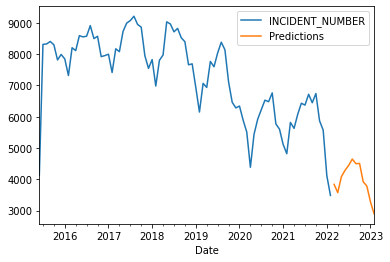

In [28]:
monthly_crime_df.INCIDENT_NUMBER.plot(legend = True)
predictions.plot(legend = True)

In [29]:
data.SUBURB.unique()

array(['East Boston', nan, 'Dorchester', 'Roxbury', 'Mattapan',
       'Downtown Boston', 'Roslindale', 'Allston', 'South End',
       'South Boston', 'Hyde Park', 'Jamaica Plain', 'West End',
       'Mission Hill', 'Back Bay', 'Fenway-Kenmore', 'Beacon Hill',
       'Brighton', 'West Roxbury', 'Charlestown', 'North End',
       'Cambridgeport'], dtype=object)

In [30]:
Roxbury_crime_df = data[data.SUBURB == "Roxbury"]
Roxbury_crime_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY,Date
4450,192074613,100,1,2019-09-16 23:46:00,2019,9,Monday,23,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,MIGRATED REPORT - CRIMINAL HOMICIDE,HOMICIDE,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2019-09-16
4451,212073779,111,0,2021-10-11 19:35:00,2021,10,Monday,19,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",HOMICIDE,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2021-10-11
4452,I182101462,301,0,2018-12-16 17:30:00,2018,12,Sunday,17,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,ROBBERY - STREET,ROBBERY,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2018-12-16
4453,192076520,400,0,2019-09-22 21:50:00,2019,9,Sunday,21,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,MIGRATED REPORT - AGGRAVATED ASSAULT/AGGRAVATE...,ROBBERY,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2019-09-22
4454,192066401,413,0,2019-08-22 16:00:00,2019,8,Thursday,16,"(42.3329339989186, -71.0924049433507)",42.332934,-71.092405,ASSAULT - AGGRAVATED - BATTERY,AGGRAVATED ASSAULT,"{'road': 'Tremont Street', 'neighbourhood': 'R...",Tremont Street,Roxbury Crossing,Roxbury,Boston,Suffolk County,2019-08-22


In [31]:
monthly_roxbury_df = Roxbury_crime_df.groupby(pd.Grouper(key = "Date", freq = "M")).count()
monthly_roxbury_df

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2015-06-30,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,250,401,401,401
2015-07-31,813,813,813,813,813,813,813,813,813,813,813,813,813,813,813,484,813,813,813
2015-08-31,852,852,852,852,852,852,852,852,852,852,852,852,852,852,852,494,852,852,852
2015-09-30,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,474,790,790,790
2015-10-31,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,447,787,787,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,33,47,47,47
2022-09-30,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,27,43,43,43
2022-10-31,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,28,40,40,40


<Axes: xlabel='Date'>

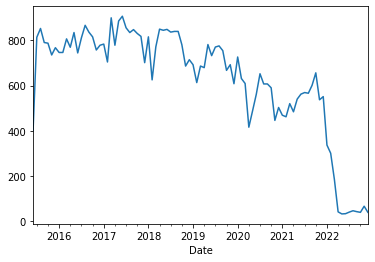

In [32]:
monthly_roxbury_df.INCIDENT_NUMBER.plot()

In [33]:
adfuller(monthly_roxbury_df.INCIDENT_NUMBER)

(-0.09802808828641502,
 0.9496345896789136,
 2,
 88,
 {'1%': -3.506944401824286,
  '5%': -2.894989819214876,
  '10%': -2.584614550619835},
 892.9995579157423)

In [34]:
Mattapan_df = data[data.SUBURB == "Mattapan"]
Mattapan_df

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY,Date
4946,I152066827,111,1,2015-08-12 22:18:00,2015,8,Wednesday,22,"(42.28079658, -71.09039724)",42.280797,-71.090397,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",HOMICIDE,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2015-08-12
4947,I172046900,111,1,2017-06-12 20:44:00,2017,6,Monday,20,"(42.28079658, -71.09039724)",42.280797,-71.090397,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",HOMICIDE,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2017-06-12
4948,I162067250,301,0,2016-08-19 18:07:00,2016,8,Friday,18,"(42.28079658, -71.09039724)",42.280797,-71.090397,ROBBERY - STREET,ROBBERY,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2016-08-19
4949,I162056541,301,0,2016-07-16 05:43:00,2016,7,Saturday,5,"(42.28079658, -71.09039724)",42.280797,-71.090397,ROBBERY - STREET,ROBBERY,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2016-07-16
4950,I162027840,301,0,2016-04-10 04:00:00,2016,4,Sunday,4,"(42.28079658, -71.09039724)",42.280797,-71.090397,ROBBERY - STREET,ROBBERY,"{'house_number': '29', 'road': 'Hosmer Street'...",Hosmer Street,NaN,Mattapan,Boston,Suffolk County,2016-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595467,212009800,3831,0,2021-02-14 11:39:00,2021,2,Sunday,11,"(42.27747566198516, -71.08264557490762)",42.277476,-71.082646,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '31', 'road': 'Glenhill Road'...",Glenhill Road,NaN,Mattapan,Boston,Suffolk County,2021-02-14
595503,202068645,3831,0,2020-09-19 14:46:00,2020,9,Saturday,14,"(42.273993979539, -71.0704610256506)",42.273994,-71.070461,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '1235', 'road': 'Morton Stree...",Morton Street,Lower Mills,Mattapan,Boston,Suffolk County,2020-09-19
595553,I182035343,3831,0,2018-05-09 23:30:00,2018,5,Wednesday,23,"(42.27044547, -71.10068751)",42.270445,-71.100688,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '747', 'road': 'Cummins Highw...",Cummins Highway,NaN,Mattapan,Boston,Suffolk County,2018-05-09
595567,212086661,3831,0,2021-11-27 00:00:00,2021,11,Saturday,0,"(42.27903515117108, -71.09871502631415)",42.279035,-71.098715,M/V - LEAVING SCENE - PROPERTY DAMAGE,MOTOR VEHICLE ACCIDENT RESPONSE,"{'house_number': '7', 'road': 'Alabama Street'...",Alabama Street,NaN,Mattapan,Boston,Suffolk County,2021-11-27


In [35]:
Mattapan_monthly_crime_df = Mattapan_df.groupby(pd.Grouper(key = "Date", freq = "M")).count()
Mattapan_monthly_crime_df

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
Date,,,,,,,,,,,,,,,,,,,
2015-06-30,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,47,247,247,247
2015-07-31,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,91,484,484,484
2015-08-31,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,91,470,470,470
2015-09-30,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,85,479,479,479
2015-10-31,440,440,440,440,440,440,440,440,440,440,440,440,440,440,440,87,440,440,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,3,27,27,27
2022-09-30,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,1,26,26,26
2022-10-31,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,1,36,36,36


<Axes: xlabel='Date'>

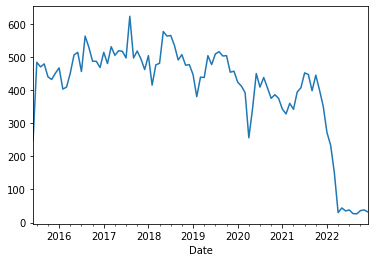

In [36]:
Mattapan_monthly_crime_df.INCIDENT_NUMBER.plot()

In [37]:
adfuller(Mattapan_monthly_crime_df.INCIDENT_NUMBER)

(1.7910839899702231,
 0.99833116867112,
 10,
 80,
 {'1%': -3.5148692050781247, '5%': -2.8984085156250003, '10%': -2.58643890625},
 822.7786487371386)

In [38]:
monthly_roxbury_df = monthly_roxbury_df.loc[:"2022-02-28"]
Mattapan_monthly_crime_df = Mattapan_monthly_crime_df.loc[:"2022-02-28"]

<Axes: xlabel='Date'>

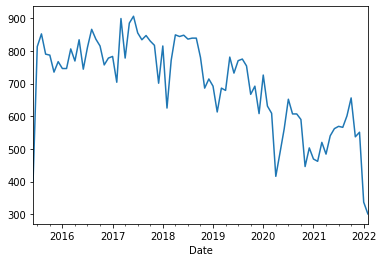

In [40]:
monthly_roxbury_df.INCIDENT_NUMBER.plot()

<Axes: xlabel='Date'>

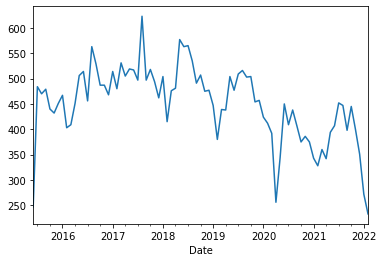

In [39]:
Mattapan_monthly_crime_df.INCIDENT_NUMBER.plot()

In [41]:
df_train = monthly_roxbury_df[:"2020-08-30"]
df_test = monthly_roxbury_df["2020-08-30":]

In [42]:
auto_arima(monthly_roxbury_df.INCIDENT_NUMBER, seasonal=True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -462.654
Date:                             Tue, 28 Mar 2023   AIC                            933.308
Time:                                     23:54:21   BIC                            942.836
Sample:                                 06-30-2015   HQIC                           937.128
                                      - 02-28-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3995      0.163      2.453      0.014       0.080       0.719
ma.L1         -0.8329      0.116     -7.187      0.000      -1.060      -0.606
ar.S.L12       0.4204      0.145      2.894      0.004       0.136       0.705
sigma2      5950.8656    916.257      6.495      0.000    4155.034    7746.697
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                58.15
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.52
Prob(H) (two-sided):                  0.74   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
model = SARIMAX(df_train.INCIDENT_NUMBER, order =(1, 1, 1), seasonal_order=(1, 0, [], 12)).fit()

In [44]:
start = "2020-08-31"
end = "2022-02-28"
predictions = model.predict(start, end, typ = "levels").rename("Predictions")

<Axes: xlabel='Date'>

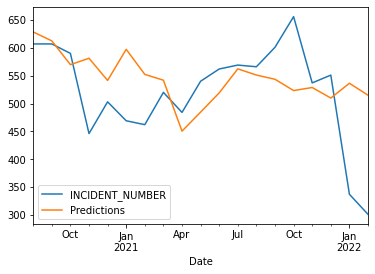

In [45]:
df_test.INCIDENT_NUMBER.plot(legend = True)
predictions.plot(legend = True)

In [46]:
rmse(predictions, df_test.INCIDENT_NUMBER)

91.8502357161681

In [47]:
mape(df_test.INCIDENT_NUMBER, predictions)

15.508902215331227

In [48]:
monthly_roxbury_df.INCIDENT_NUMBER.mean()

696.0246913580247

In [49]:
model = SARIMAX(monthly_roxbury_df.INCIDENT_NUMBER, order =(1, 1, 1), seasonal_order=(1, 0, [], 12)).fit()

In [50]:
predictions = model.predict(len(monthly_roxbury_df), len(monthly_roxbury_df) + 11, typ = "levels").rename("Predictions")

<Axes: xlabel='Date'>

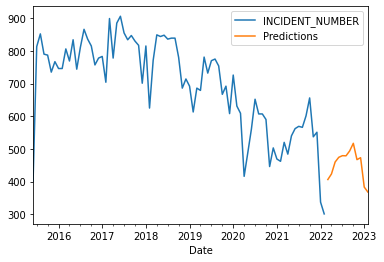

In [51]:
monthly_roxbury_df.INCIDENT_NUMBER.plot(legend = True)
predictions.plot(legend = True)

In [52]:
auto_arima(monthly_crime_df.INCIDENT_NUMBER, start_p = 0, start_q = 0,
          max_p = 6, max_q = 6, seasonal = True, trace = True, m = 12).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1267.618, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1280.583, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1268.887, Time=0.38 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1274.519, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1278.593, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1274.607, Time=0.16 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1269.809, Time=0.24 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1269.618, Time=1.72 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1269.618, Time=2.46 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1272.081, Time=0.87 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1268.845, Time=0.95 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1271.596, Time=1.67 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1266.694, Time=0.54 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1273.960, Time=0.36 sec
 ARIMA(1,1,0)(2,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   81
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -628.366
Date:                              Wed, 29 Mar 2023   AIC                           1264.732
Time:                                      00:09:06   BIC                           1274.260
Sample:                                  06-30-2015   HQIC                          1268.552
                                       - 02-28-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2385      0.091      2.623      0.009       0.060       0.417
ar.S.L12       0.8898      0.109      8.149      0.000       0.676       1.104
ma.S.L12      -0.6205      0.203     -3.057      0.002      -1.018      -0.223
sigma2      3.743e+05    5.1e+04      7.341      0.000    2.74e+05    4.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.92   Jarque-Bera (JB):               358.94
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             1.75
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
auto_arima(monthly_crime_df.INCIDENT_NUMBER, seasonal=False).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   81
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -633.443
Date:                Wed, 29 Mar 2023   AIC                           1272.886
Time:                        00:11:06   BIC                           1280.032
Sample:                    06-30-2015   HQIC                          1275.751
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2657      0.067      3.961      0.000       0.134       0.397
ma.L2          0.5084      0.116      4.368      0.000       0.280       0.736
sigma2      4.515e+05   5.13e+04      8.795      0.000    3.51e+05    5.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.81   Jarque-Bera (JB):               161.56
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.52
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
monthly_crime_df["Diff_1"] = diff(monthly_crime_df.INCIDENT_NUMBER, k_diff = 1)
monthly_crime_df.Diff_1

Date
2015-06-30       NaN
2015-07-31    4181.0
2015-08-31      14.0
2015-09-30      78.0
2015-10-31    -105.0
               ...  
2021-10-31     295.0
2021-11-30    -870.0
2021-12-31    -301.0
2022-01-31   -1453.0
2022-02-28    -634.0
Freq: M, Name: Diff_1, Length: 81, dtype: float64

In [57]:
adfuller(monthly_crime_df.Diff_1.dropna())

(-4.0472097127922835,
 0.0011825137616685835,
 11,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 1011.3891594515771)

In [58]:
auto_arima(monthly_crime_df.Diff_1.dropna(), seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                        SARIMAX   Log Likelihood                -638.297
Date:                Wed, 29 Mar 2023   AIC                           1278.593
Time:                        00:14:36   BIC                           1280.975
Sample:                    07-31-2015   HQIC                          1279.548
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.986e+05   2.85e+04     17.489      0.000    4.43e+05    5.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               681.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             2.48
Prob(H) (two-sided):                  0.04   Kurtosis:                        16.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

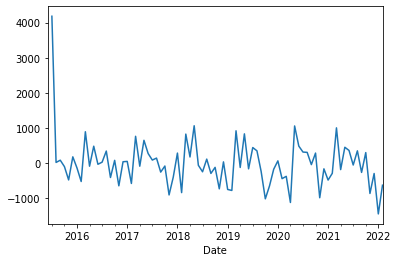

In [59]:
monthly_crime_df.Diff_1.plot()

<Axes: xlabel='Date'>

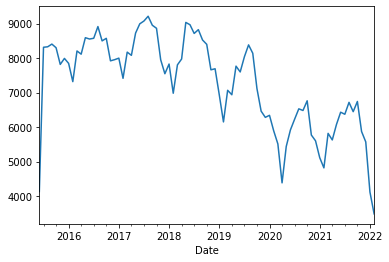

In [60]:
monthly_crime_df.INCIDENT_NUMBER.plot()

In [61]:
adfuller(monthly_crime_df.INCIDENT_NUMBER)

(0.6557304446261643,
 0.9889116965770363,
 12,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 1030.8337714454578)

In [62]:
auto_arima(monthly_crime_df.INCIDENT_NUMBER, seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   81
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -633.443
Date:                Wed, 29 Mar 2023   AIC                           1272.886
Time:                        00:17:17   BIC                           1280.032
Sample:                    06-30-2015   HQIC                          1275.751
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2657      0.067      3.961      0.000       0.134       0.397
ma.L2          0.5084      0.116      4.368      0.000       0.280       0.736
sigma2      4.515e+05   5.13e+04      8.795      0.000    3.51e+05    5.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.81   Jarque-Bera (JB):               161.56
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.52
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

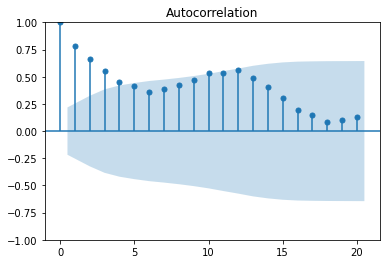

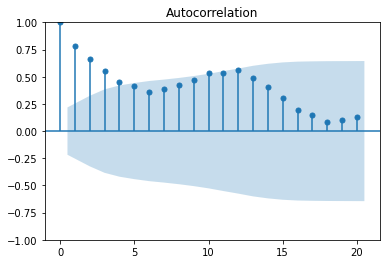

In [64]:
plot_acf(monthly_crime_df.INCIDENT_NUMBER, lags = 20)

In [68]:
train = monthly_crime_df[:"2020-08-30"]
test = monthly_crime_df["2020-08-30":]
